In [1]:
import tensorflow.compat.v1 as tf
#Lets see if tensorflow finds the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
#import tensorflow as tf

2023-04-05 17:32:15.943311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 17:32:15.981827: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Num GPUs Available:  1


2023-04-05 17:32:16.818488: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 17:32:16.832297: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 17:32:16.832414: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
#Lets see if it works
tf.ones(1) + tf.ones(1)

2023-04-05 17:32:16.835935: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-05 17:32:16.836373: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 17:32:16.836465: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-05 17:32:16.836534: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative val

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.], dtype=float32)>

In [3]:
import numpy as np # for working with arrays and matrices
import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization

import os # OS module provides various operating system-related functions to the code
import csv # CSV module is used for working with CSV (Comma Separated Values) files in Python.
import pickle



# used for splitting data into training and testing sets in Python.
from sklearn.model_selection import train_test_split 

# for generating a confusion matrix
from sklearn.metrics import confusion_matrix
from keras.models import load_model


# Classes and functions from the Keras library which is used for building and training deep learning models in Python.
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# These import the Adam optimizer class and various other classes from the TensorFlow Keras library 
# which is a high-level neural networks API used for building and training deep learning models in Python.
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
# Load the history object from the pickle file
with open('history.pkl', 'rb') as f:
    history = pickle.load(f)
    
with open('train_images.pkl', 'rb') as f:
    train_images = pickle.load(f)
    
with open('train_labels.pkl', 'rb') as f:
    train_labels = pickle.load(f)

In [5]:
# Inspect the contents of the pickle file
print(history)

{'loss': [1.037494421005249, 0.9920743107795715, 0.9662478566169739, 0.9220812916755676, 0.8687512278556824, 0.8337916731834412, 0.8063837289810181, 0.7776334285736084, 0.7541899681091309, 0.7277536392211914], 'accuracy': [0.45036399364471436, 0.4620765447616577, 0.4839562475681305, 0.5250315070152283, 0.5709463357925415, 0.5972995758056641, 0.615193784236908, 0.6315019130706787, 0.647443950176239, 0.6661515235900879]}


In [6]:
# plot the accuracy and loss of the model during training. (validation later)
def plot_accuracy():
    plt.plot(history['accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper left')
    plt.savefig('accuracy.png')
    return plt.show()

def plot_loss():
    plt.plot(history['loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train'], loc='upper right')
    plt.savefig('loss.png')
    return plt.show()

def plot_cm(no_of_behaviors, confusion):
    

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(8,6))
    cmap = plt.get_cmap('Blues')

    tick_marks = np.arange(len(no_of_behaviors))
    plt.xticks(tick_marks, no_of_behaviors, rotation=45)
    plt.yticks(tick_marks, no_of_behaviors)
    plt.tight_layout()

    ax.imshow(confusion, interpolation='nearest', cmap=cmap)
    ax.set_xticks(np.arange(len(no_of_behaviors)))
    ax.set_yticks(np.arange(len(no_of_behaviors)))
    ax.set_xticklabels(no_of_behaviors)
    ax.set_yticklabels(no_of_behaviors)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

    # cm = confusion_matrix (train_labels, predicted_labels)
    # print(cm)

    # Add text annotations to the confusion matrix boxes
    for i in range(len(no_of_behaviors)):
        for j in range(len(no_of_behaviors)):
            ax.text(j, i, str(f'{(confusion[i, j]/counts[i])*100:.2f}%'), ha='center', va='center', color='black')

# Set the title
    plt.savefig('cm.png')
    ax.set_title('Confusion Matrix')
    return plt.show()

In [7]:
# format the train_labels to be appropriate for the predict method
train_labels = np.argmax(train_labels, axis=1)

# Predict the class labels of the training images using the trained model
model = load_model('BPNN_V1_model.h5')
predicted_labels = np.argmax(model.predict(train_images), axis=1)

# Compute the confusion matrix using the predicted class labels and the true class labels
confusion = confusion_matrix(train_labels, predicted_labels)
no_of_behaviors = ['Main Corr', 'Left Corr', 'Right Corr']


2023-04-05 17:32:30.475197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401


 19/769 [..............................] - ETA: 6s

2023-04-05 17:32:31.385947: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


769/769 [==============================] - 9s 9ms/step


In [10]:
main = 11336
left = 9643
right = 3610
total_counts = main + left + right
counts = [main, left, right]

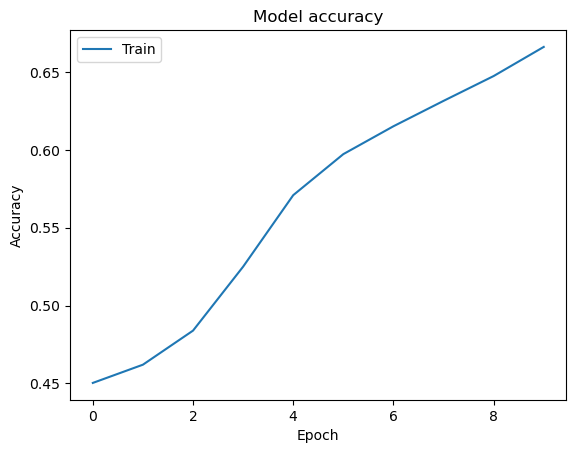

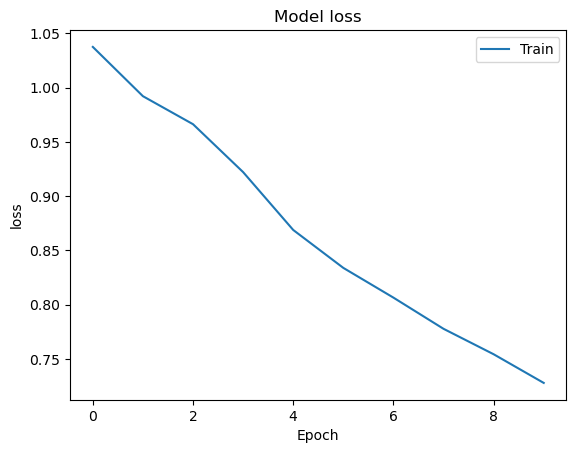

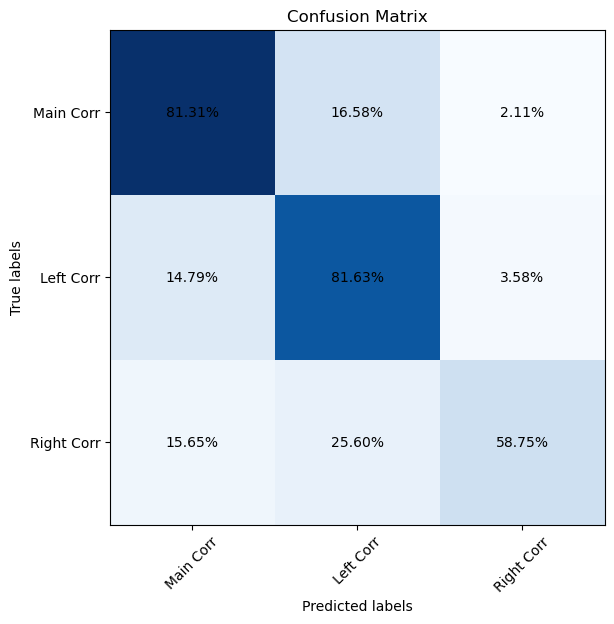

In [12]:
plot_accuracy()
plot_loss()
plot_cm(no_of_behaviors, confusion)